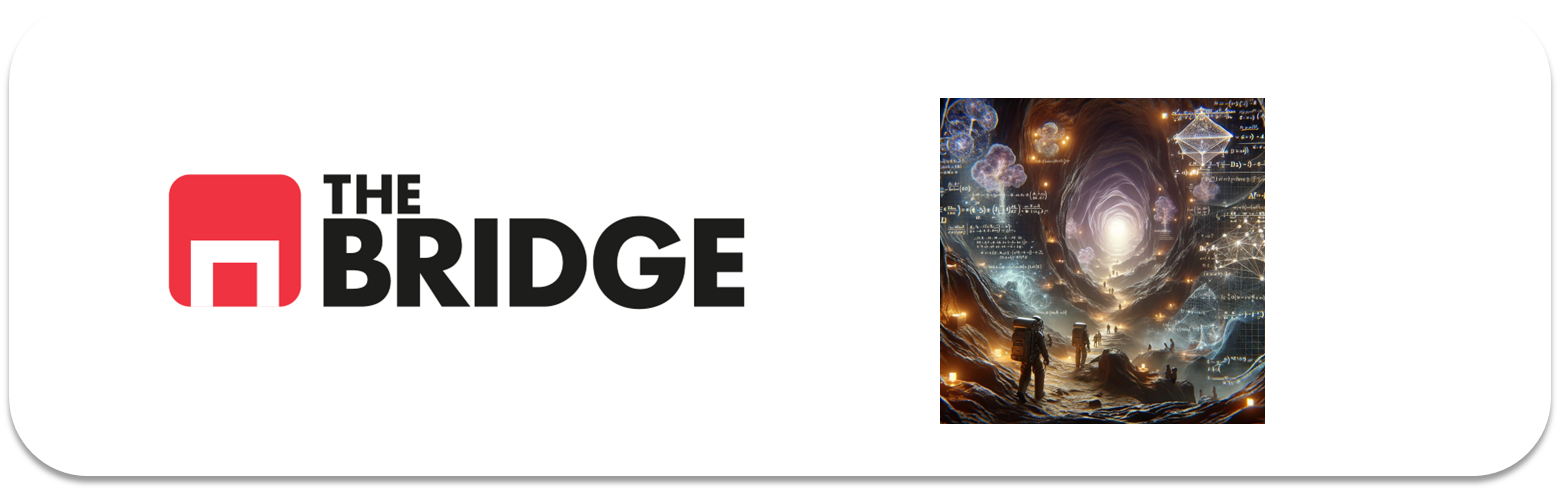

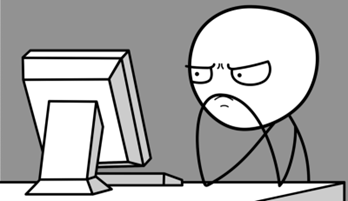

Para ejercitarte y afianzar lo aprendido sobre **Keras y DL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Predecir eficiencia de gasolina

En este conjuntos de ejercicios vamos a trabajar sobre el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) para construir un modelo DL para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Para la construcción del modelo vamos a utilizar Keras.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Librerias Bootcamp (Data Science - The Bridge Oct24')
# ==============================================================================
import bootcampviztools as bvt
import toolbox_ML as tml

# Semilla 42 para garantizar que los datos se mantengan
# ==============================================================================
np.random.seed(42)

# Preprocesado y modelado
# ==============================================================================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Misc
# ==============================================================================
import time


### Ejercicio 1

Carga los datos en un dataframe, utilizando como nombre de columnas los siguientes:

```python
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
``` 


In [2]:
# Definir los nombres de las columnas (sin incluir la columna del nombre del auto)
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 
                'Acceleration', 'Model Year', 'Origin']

# Cargar el archivo de datos
df = pd.read_csv(
    "./data/Autos_data.txt",  # Ruta del archivo
    sep=r'\s+',  # Usar expresión regular para manejar múltiples espacios como separadores
    names=column_names,  # Asignar nombres a las columnas
    usecols=range(len(column_names))  # Leer solo las columnas definidas (ignorando el nombre del auto)
)

# Mostrar las primeras filas del DataFrame para verificar que la carga fue correcta
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


| **Column Name**   | **Data Type** | **Description**                                                                                      |
|-------------------|---------------|------------------------------------------------------------------------------------------------------|
| **MPG**           | float64       | Millas por galón (millas recorridas por cada galón de combustible), representa la eficiencia de combustible del vehículo. |
| **Cylinders**     | int64         | Número de cilindros del motor del vehículo.                                                          |
| **Displacement**  | float64       | Volumen total de los cilindros del motor en pulgadas cúbicas (cuánto "desplaza" el motor por ciclo). |
| **Horsepower**    | object        | Potencia del motor medida en caballos de fuerza. En algunos casos puede estar representado por un "?" para valores perdidos. |
| **Weight**        | float64       | Peso del vehículo en libras.                                                                          |
| **Acceleration**  | float64       | Aceleración del vehículo (en segundos para alcanzar 60 millas por hora).                             |
| **Model Year**    | int64         | Año de fabricación del modelo del automóvil.                                                          |
| **Origin**        | int64         | Región de fabricación del vehículo: 1 = EE. UU., 2 = Europa, 3 = Japón.                              |


### Ejercicio 2: Limpieza inicial

Echa un primer vistazo. Limpia columnas "raras". Deshazte de nulos (cuidado aquí), arregla el tipo de las features numéricas si fuera necesario. Haz una lista de las features categóricas que tuvieramos que convertir posteriormente. (Es antes del split pero no importa para este ejercicio)

In [3]:
for col in df.columns:
    print(f"\n🔹 Value Counts de '{col}':")
    print(df[col].value_counts())
    print("_" * 50)


🔹 Value Counts de 'MPG':
MPG
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 129, dtype: int64
__________________________________________________

🔹 Value Counts de 'Cylinders':
Cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64
__________________________________________________

🔹 Value Counts de 'Displacement':
Displacement
97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: count, Length: 82, dtype: int64
__________________________________________________

🔹 Value Counts de 'Horsepower':
Horsepower
150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
         ..
61.00     1
93.00     1
148.0     1
152.0     1
82.00     1
Name: count, Length: 94, dtype: int64
__________________________________________________

🔹 Value Counts de 'Weight':
Weight
1985.0    4
2130.0    4
2

In [4]:
df["Displacement"].unique()

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 113. , 198. , 199. , 200. ,  97. ,
       110. , 107. , 104. , 121. , 360. , 140. ,  98. , 232. , 225. ,
       250. , 351. , 258. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,
        91. ,  97.5,  70. , 120. ,  96. , 108. , 155. ,  68. , 114. ,
       156. ,  76. ,  83. ,  90. , 231. , 262. , 134. , 119. , 171. ,
       115. , 101. , 305. ,  85. , 130. , 168. , 111. , 260. , 151. ,
       146. ,  80. ,  78. , 105. , 131. , 163. ,  89. , 267. ,  86. ,
       183. , 141. , 173. , 135. ,  81. , 100. , 145. , 112. , 181. ,
       144. ])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [6]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
tml.describe_df(df)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,MPG,float64,0.0,129,32.412060
1,Cylinders,int64,0.0,5,1.256281
2,Displacement,float64,0.0,82,20.603015
3,Horsepower,object,0.0,94,23.618090
4,Weight,float64,0.0,351,88.190955
5,Acceleration,float64,0.0,95,23.869347
6,Model Year,int64,0.0,13,3.266332
7,Origin,int64,0.0,3,0.753769


In [8]:
df["Horsepower"].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [9]:
df["Horsepower"] = df["Horsepower"].replace('?', np.nan).astype("float64")

In [10]:
for col in ['Origin', 'Model Year', 'Weight', 'Cylinders', "Displacement"]:
    df[col] = df[col].astype("int64")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    int64  
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.0 KB


### Ejercicio 3

Antes de seguir nos informan que las etiquetas de "origin" correspoden a  USA para el 1, Europa para el 2 y Japón para el 3. Convierte origin a esos valores porque queremos tener el literal. Luego haz directamente un one-hot encoding de esas variable.  

*NOTA: Realmente los one-hot-encoding se pueden hacer contra el dataset original desde el principio (no afectan unos a otros), si no los hacemos es porque hasta que no se han analizado las variables puede que no tengamos claro que queremos hacer si una codificación ordinal, una vectorización (onehot) o bien queremos hacer otro cambio en la variable y esos vienen dados por la relación de la categórica con el target y por tanto sólo se pueden ver en el train. Pero si por lo que sea sabemos seguros que vamos a hacer vectorización no hay problema en hacerlo antes del split. Por otro lado, siempre conviene quedarse con una categoria unkown para valores que pueden llegar en el futuro antes de un recalibrado.*


In [12]:
df['Origin'] = df['Origin'].map({1:'USA', 2:'Europe', 3:'Japan'})

In [13]:
df = pd.get_dummies(df, columns=['Origin'], dtype=int)
df.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
0,18.0,8,307,130.0,3504,12.0,70,0,0,1
1,15.0,8,350,165.0,3693,11.5,70,0,0,1
2,18.0,8,318,150.0,3436,11.0,70,0,0,1


### Ejercicio 4

Divide los datos en train y test. Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo. Emplea una variable target para guardar el nombre de la columna target.

NOTA: El resultado tienen que ser dos datasets

In [14]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
target = 'MPG'

In [16]:
train_set["Horsepower"] = train_set["Horsepower"].fillna(df["Horsepower"].median())
test_set["Horsepower"] = test_set["Horsepower"].fillna(df["Horsepower"].median())

### Ejercicio 5

Inspecciona los datos. Revisa rápidamente la distribución conjunta del dataset de entrenamiento mediante un grid de gráficos

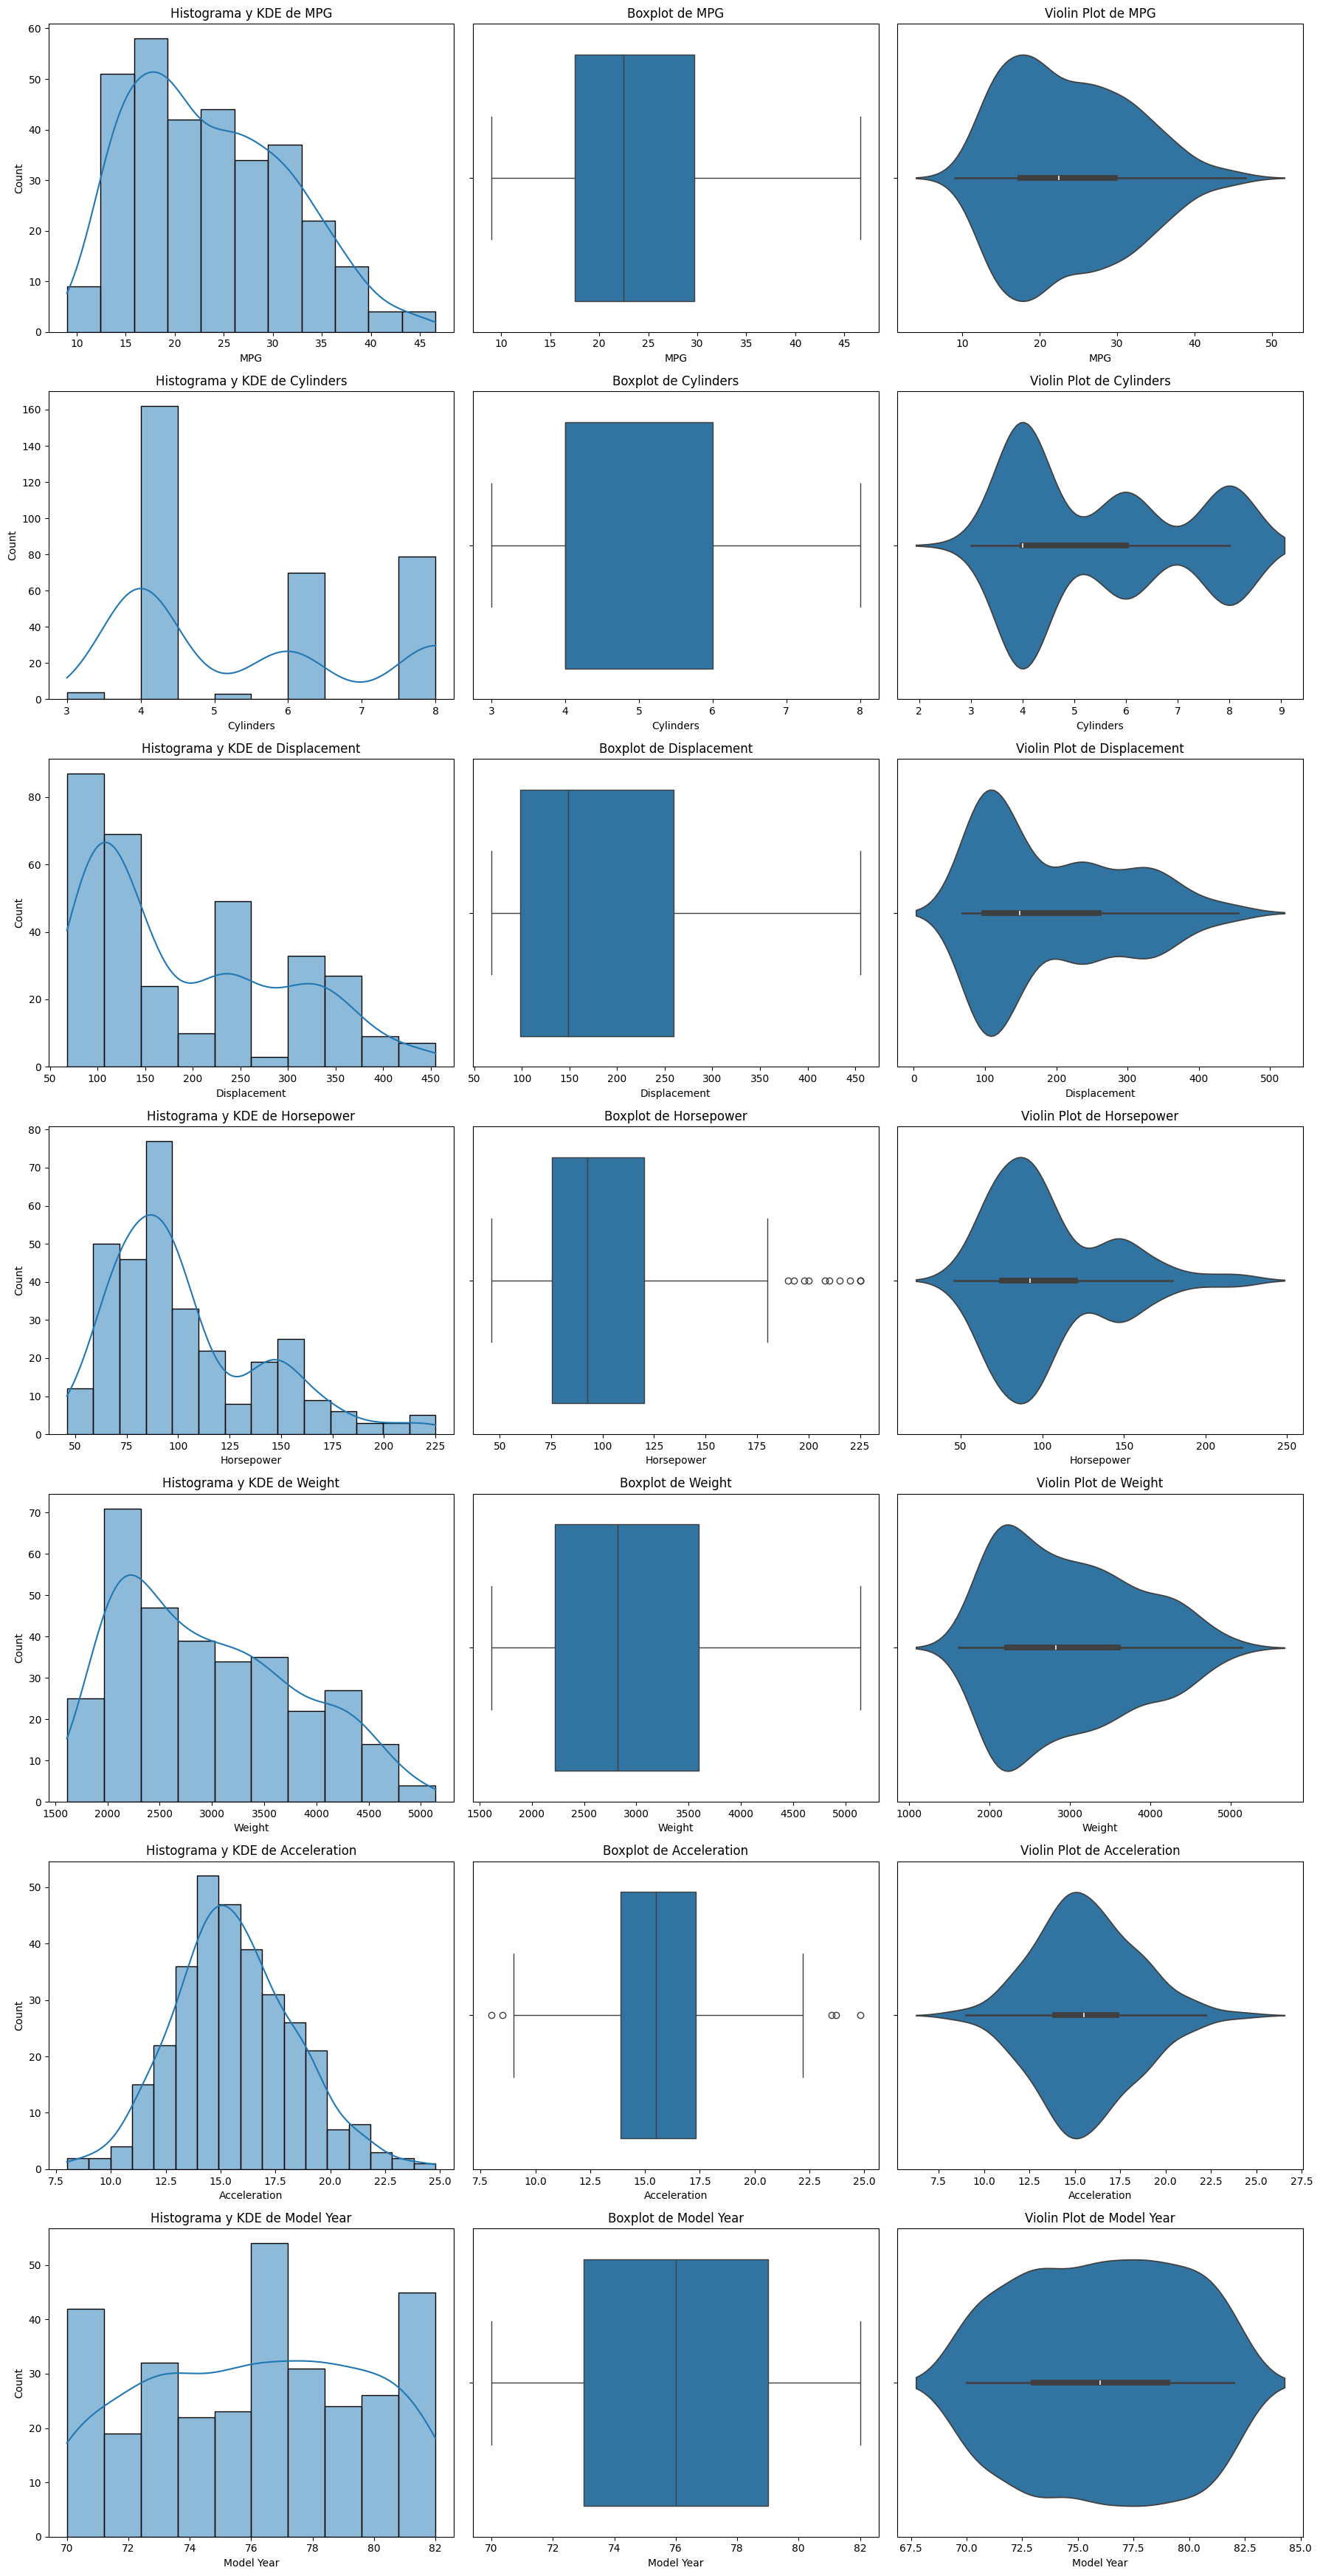

In [17]:
bvt.plot_combined_graphs(train_set, train_set.drop(columns=["Origin_Europe", "Origin_Japan", "Origin_USA"]).columns)

In [18]:
features = [col for col in train_set.columns if col != target]
features

['Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model Year',
 'Origin_Europe',
 'Origin_Japan',
 'Origin_USA']

In [19]:
corr = train_set.corr()
np.abs(corr[target]).sort_values(ascending = False)

MPG              1.000000
Weight           0.827333
Displacement     0.801534
Cylinders        0.770459
Horsepower       0.766704
Model Year       0.586743
Origin_USA       0.575216
Origin_Japan     0.434762
Acceleration     0.390101
Origin_Europe    0.271443
Name: MPG, dtype: float64

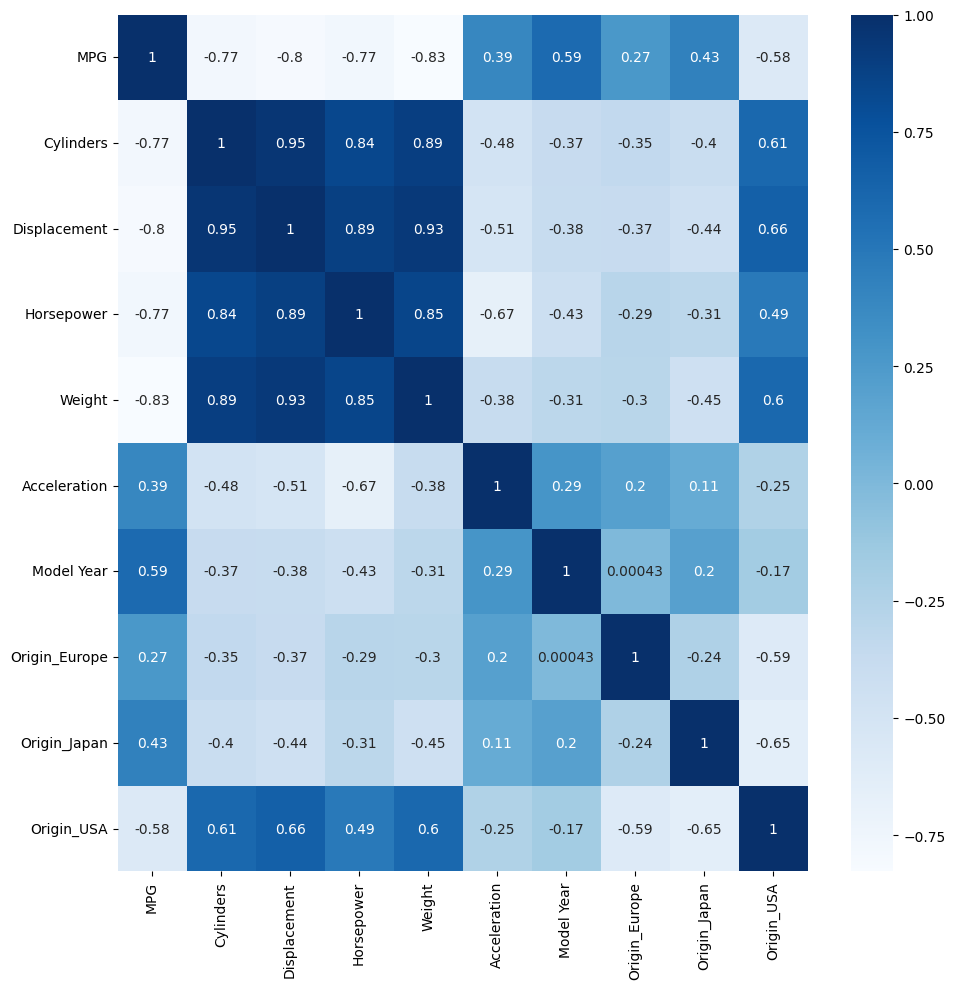

In [20]:
plt.figure(figsize= (10,10))
sns.heatmap(corr, annot = True, cmap = "Blues")
plt.tight_layout()
plt.show()

### Ejercicio 6 

Independientemente de lo que hayas encontrado en el análisis anterior, vamos a utilizar todas las features y antes las vamos a escalar. Estandardiza train y test.

In [21]:
scaler = StandardScaler()

train_set[features] = scaler.fit_transform(train_set[features])
test_set[features] = scaler.transform(test_set[features])

train_set.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
count,318.000000,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02
mean,23.608176,1.508228e-16,-1.228926e-16,7.261836e-17,2.401992e-16,-1.396507e-16,-1.904835e-15,-3.351617e-17,-1.117206e-17,1.005485e-16
std,7.930574,1.001576e+00,1.001576e+00,1.001576e+00,1.001576e+00,1.001576e+00,1.001576e+00,1.001576e+00,1.001576e+00,1.001576e+00
min,9.000000,-1.444941e+00,-1.205005e+00,-1.542943e+00,-1.615661e+00,-2.769176e+00,-1.696667e+00,-4.623207e-01,-5.117663e-01,-1.267500e+00
25%,17.500000,-8.505148e-01,-9.083798e-01,-7.529783e-01,-8.924344e-01,-6.306586e-01,-8.627566e-01,-4.623207e-01,-5.117663e-01,-1.267500e+00
50%,22.450000,-8.505148e-01,-4.221082e-01,-2.871016e-01,-1.745700e-01,-5.072168e-02,-2.884597e-02,-4.623207e-01,-5.117663e-01,7.889544e-01
75%,29.725000,3.383367e-01,6.574147e-01,4.556003e-01,7.485262e-01,6.017073e-01,8.050647e-01,-4.623207e-01,-5.117663e-01,7.889544e-01
max,46.600000,1.527188e+00,2.558737e+00,3.291371e+00,2.586676e+00,3.320162e+00,1.638975e+00,2.163001e+00,1.954017e+00,7.889544e-01


## El modelo

### Ejercicio 7: Construye el modelo con Keras

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Es decir una MLP con dos capas ocultas.

Por tanto, tendrá tres capas. Una inicial con activación relu (usa el argumento `input_shape` para darle el número de features). Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres interesantes para las dos primeras capas (NOTA: En este caso partimos de pocas features, por lo que puede ser interesante poner 2 o 3 como mínimo el número de features para poder obtener unas pseudofeatures que intenten capturar las interrelaciones.)

Otros datos:

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

Utiliza una aproximación en prisma (mismo numero de unidades en las capas ocultas)

In [22]:
model = keras.models.Sequential([
    layers.Input(shape=(len(features),)),
    layers.Dense(27, activation='relu'),
    layers.Dense(18, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae','mse'])

### Ejercicio 8

Inspecciona el modelo usando el método `.summary` para imprimir una descripción simple del modelo

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 27)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 793 (3.10 KB)

 Trainable params: 793 (3.10 KB)

 Non-trainable params: 0 (0.00 B)

### Ejercicio 9 Entrenar el modelo

Entrena el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

In [24]:
X_train = train_set[features]
y_train = train_set[target]

X_test = test_set[features]
y_test = test_set[target]

In [25]:
history = model.fit(X_train, y_train, epochs=1000,
                    validation_split=0.2)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 643.3914 - mae: 24.1053 - mse: 643.3914 - val_loss: 622.4409 - val_mae: 23.8017 - val_mse: 622.4409
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 619.0416 - mae: 23.6494 - mse: 619.0416 - val_loss: 612.4871 - val_mae: 23.5774 - val_mse: 612.4871
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 600.0427 - mae: 23.1716 - mse: 600.0427 - val_loss: 603.3762 - val_mae: 23.3728 - val_mse: 603.3762
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 543.7601 - mae: 22.0361 - mse: 543.7601 - val_loss: 594.0379 - val_mae: 23.1666 - val_mse: 594.0379
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 594.1098 - mae: 22.9703 - mse: 594.1098 - val_loss: 584.4255 - val_mae: 22.9543 - val_mse: 584.4255
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 591.8223 - mae: 23.0420 - mse: 591.8223 - val_loss: 574.3069 - val_mae: 22.7330 - val_mse: 574.3069
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step -

### Ejercicio 10

Visualiza el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`. Muestra la evolución del error en train y validation por un lado, y la evolución de la pérdida (loss), también train contra validation, en otra.

In [26]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 'auto', 'epochs': 1000, 'steps': 8}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 2

{'loss': [629.512939453125,
  616.4273071289062,
  606.83251953125,
  597.3012084960938,
  587.5272216796875,
  577.334228515625,
  566.5393676757812,
  554.7715454101562,
  542.0906982421875,
  528.5366821289062,
  513.9537963867188,
  498.32635498046875,
  481.6547546386719,
  464.0140380859375,
  445.29742431640625,
  425.2523498535156,
  404.23907470703125,
  382.5097961425781,
  359.7713317871094,
  336.1099853515625,
  311.97064208984375,
  287.7149963378906,
  263.1247253417969,
  238.69859313964844,
  214.61907958984375,
  190.88233947753906,
  168.20147705078125,
  146.79269409179688,
  126.66923522949219,
  108.24042510986328,
  92.14789581298828,
  78.01651000976562,
  65.90007019042969,
  55.92024230957031,
  47.814571380615234,
  41.41792678833008,
  36.52054214477539,
  32.71431350708008,
  29.60824966430664,
  26.89617347717285,
  24.58154296875,
  22.450763702392578,
  20.65035057067871,
  19.133445739746094,
  17.82261085510254,
  16.817094802856445,
  15.9132890701293

In [27]:
df_train_history = pd.DataFrame(history.history)
df_train_history['epoch'] = history.epoch
df_train_history

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,629.512939,23.851442,629.512939,622.440857,23.801725,622.440857,0
1,616.427307,23.550362,616.427307,612.487122,23.577362,612.487122,1
2,606.832520,23.329840,606.832520,603.376160,23.372786,603.376160,2
3,597.301208,23.115498,597.301208,594.037903,23.166580,594.037903,3
4,587.527222,22.895826,587.527222,584.425537,22.954269,584.425537,4
...,...,...,...,...,...,...,...
995,4.624727,1.442097,4.624727,8.443236,2.309253,8.443236,995
996,4.586582,1.447362,4.586582,8.431985,2.304110,8.431985,996
997,4.630100,1.454522,4.630100,8.176937,2.248042,8.176937,997
998,4.556498,1.414307,4.556498,8.568629,2.343090,8.568629,998


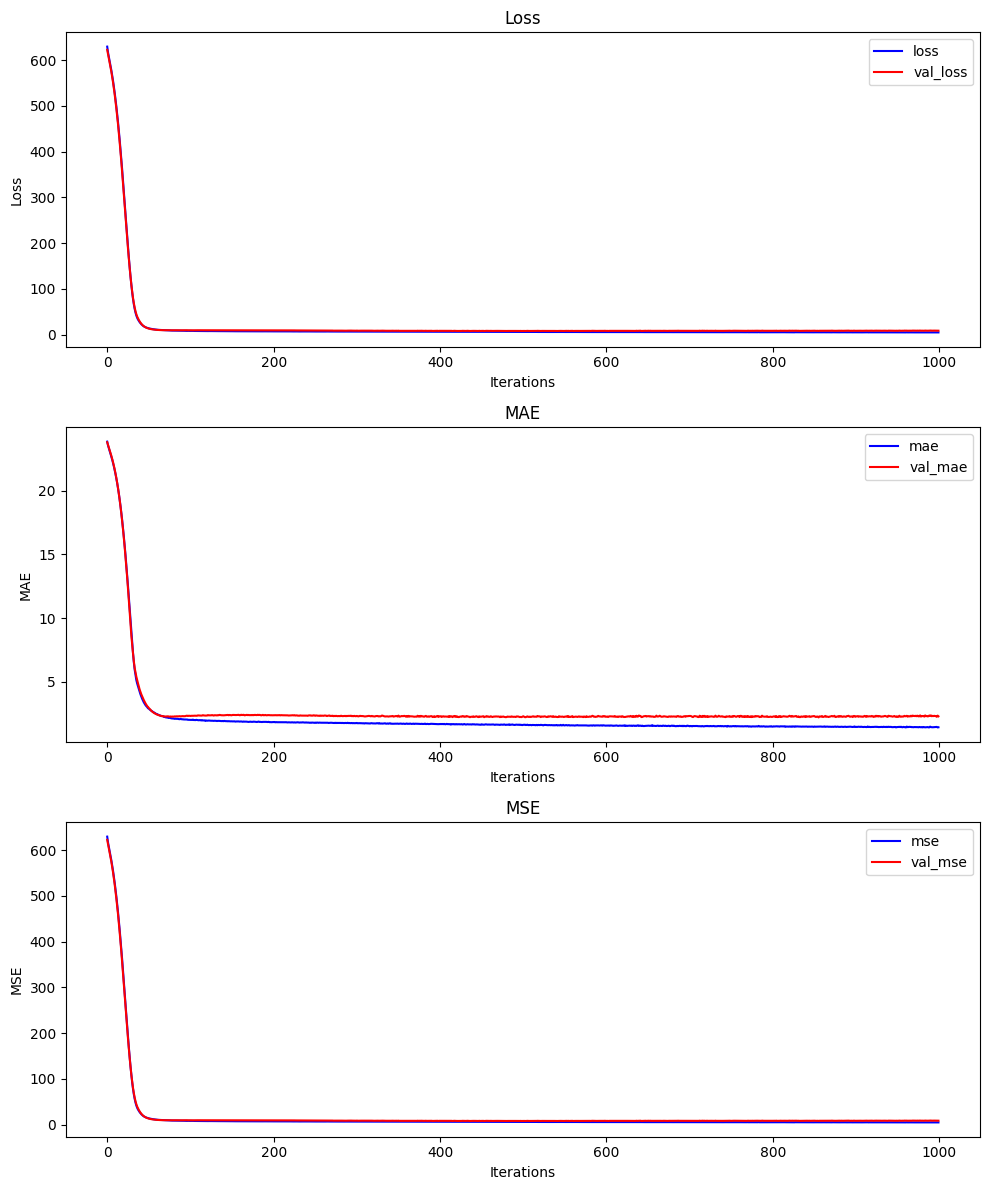

In [28]:
# Crear una figura con varias subgráficas
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Graficar 'loss' y 'val_loss'
ax[0].plot(df_train_history['loss'], label='loss', color='blue')
ax[0].plot(df_train_history['val_loss'], label='val_loss', color='red')
ax[0].set_title('Loss')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Graficar 'mae' y 'val_mae'
ax[1].plot(df_train_history['mae'], label='mae', color='blue')
ax[1].plot(df_train_history['val_mae'], label='val_mae', color='red')
ax[1].set_title('MAE')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('MAE')
ax[1].legend()

# Graficar 'mse' y 'val_mse'
ax[2].plot(df_train_history['mse'], label='mse', color='blue')
ax[2].plot(df_train_history['val_mse'], label='val_mse', color='red')
ax[2].set_title('MSE')
ax[2].set_xlabel('Iterations')
ax[2].set_ylabel('MSE')
ax[2].legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

### Ejercicio 11

Comenta las gráficas anteriores.

### Ejercicio 12

Independientemente de lo comentado en 11, vamos a añadir un callback al entrenamiento. Para ello, construye el modelo otra vez y vuelve a compilarlo (si no lo haces, como ya sabes comenzará el entrenamiento donde lo dejó y no nos valdrá el callback para nada). Entrena el modelo con los mismos hiperparámetros del ejercicio 10 y pinta la gráfica de evolución de los errores e interprétalo (obten el MAE medio una vez "estabilizado" el entrenamiento).  

Para el earlystopping utiliza un margen de 20 epochs.

In [29]:
model = keras.models.Sequential([
    layers.Input(shape=(len(features),)),
    layers.Dense(27, activation='relu'),
    layers.Dense(18, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae','mse'])

history = model.fit(X_train, y_train,
                    epochs=1000, validation_split=0.2,
                    verbose=0,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)])

df_train_history2 = pd.DataFrame(history.history)
df_train_history2['epoch'] = history.epoch
df_train_history2

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,608.693298,23.299389,608.693298,598.481201,23.216093,598.481201,0
1,589.463440,22.873053,589.463440,581.180420,22.831442,581.180420,1
2,572.064026,22.480927,572.064026,563.744629,22.443066,563.744629,2
3,554.304016,22.081116,554.304016,545.864014,22.038582,545.864014,3
4,535.594543,21.653654,535.594543,526.574524,21.599438,526.574524,4
...,...,...,...,...,...,...,...
73,7.835812,2.002693,7.835812,9.338627,2.375319,9.338627,73
74,7.898888,2.004303,7.898888,9.214886,2.352638,9.214886,74
75,7.770303,1.995112,7.770303,9.145365,2.343519,9.145365,75
76,7.877042,2.011930,7.877042,9.139771,2.339732,9.139771,76


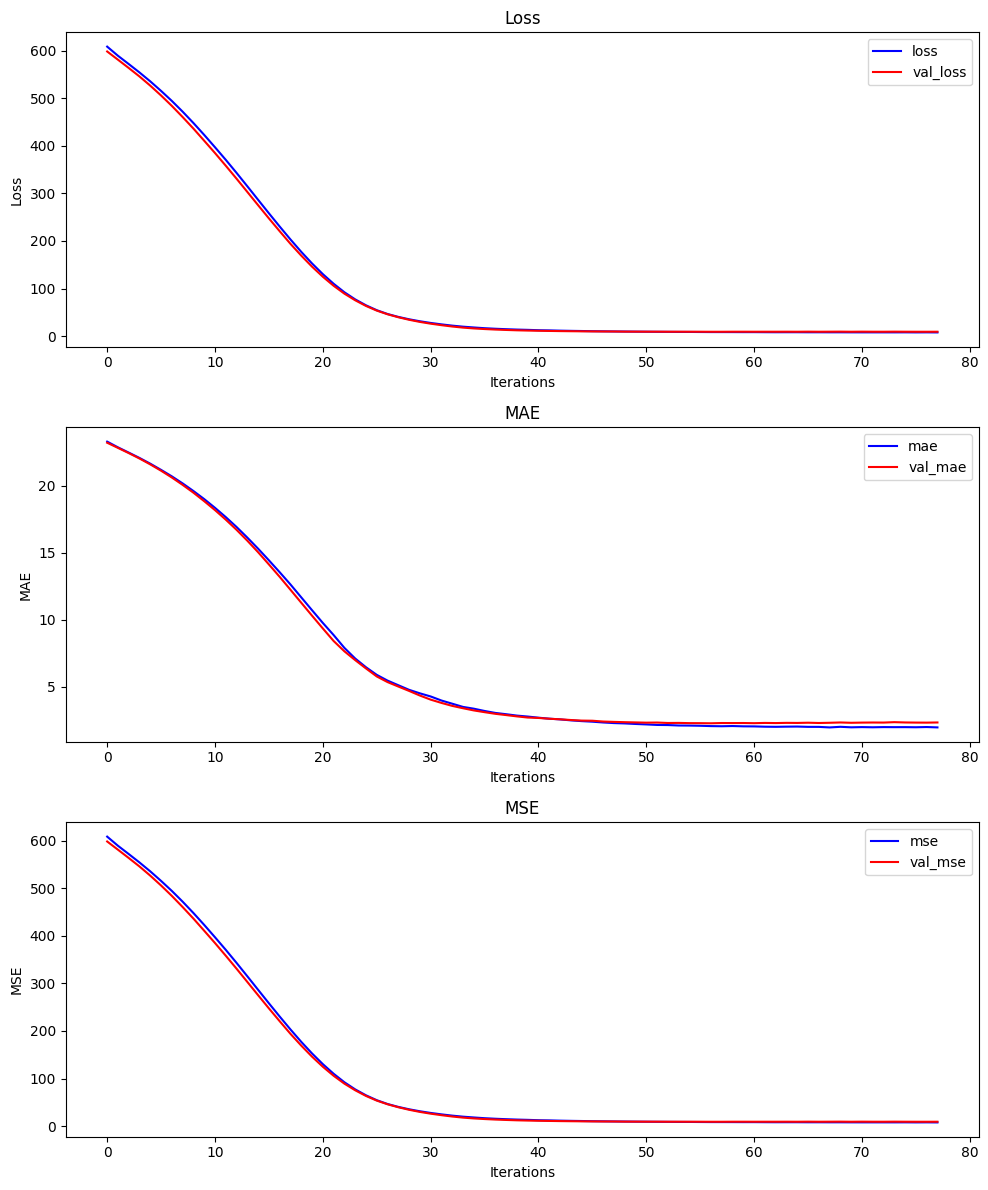

In [30]:
# Crear una figura con varias subgráficas
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Graficar 'loss' y 'val_loss'
ax[0].plot(df_train_history2['loss'], label='loss', color='blue')
ax[0].plot(df_train_history2['val_loss'], label='val_loss', color='red')
ax[0].set_title('Loss')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Graficar 'mae' y 'val_mae'
ax[1].plot(df_train_history2['mae'], label='mae', color='blue')
ax[1].plot(df_train_history2['val_mae'], label='val_mae', color='red')
ax[1].set_title('MAE')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('MAE')
ax[1].legend()

# Graficar 'mse' y 'val_mse'
ax[2].plot(df_train_history2['mse'], label='mse', color='blue')
ax[2].plot(df_train_history2['val_mse'], label='val_mse', color='red')
ax[2].set_title('MSE')
ax[2].set_xlabel('Iterations')
ax[2].set_ylabel('MSE')
ax[2].legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

Interpreta el gráfico

### Ejercicio 13

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [31]:
# Evaluamos el modelo con el conjunto de test
results = model.evaluate(X_test, y_test)

# Creamos un DataFrame con los resultados y asignamos nombres de columnas dinámicamente
results_df = pd.DataFrame([results], columns=['Loss', 'MAE', "MSE"])

# Mostrar el DataFrame con los resultados
results_df

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.3382 - mae: 1.7338 - mse: 5.3382 


,Loss,MAE,MSE
0,5.068565,1.675395,5.068565


### Ejercicio 14

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


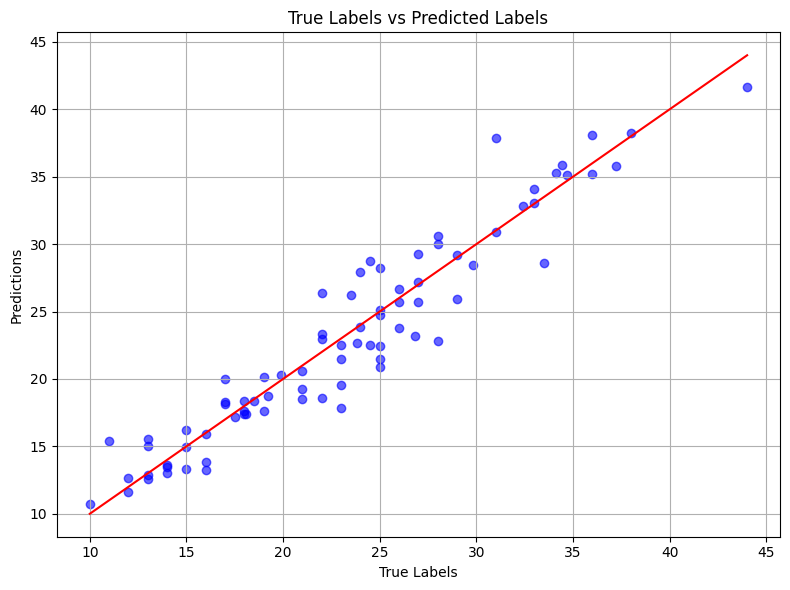

In [34]:
# Obtener las predicciones del modelo en el conjunto de test
predictions = model.predict(X_test)

# Crear un gráfico de dispersión (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='blue')

# Añadir etiquetas y título
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('True Labels vs Predicted Labels')

# Mostrar una línea de referencia (y = x) para comparar visualmente la precisión
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()
